In [694]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import metrics
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nigerian-car-prices-dataset/car_prices.csv


In [695]:
data = pd.read_csv('/kaggle/input/nigerian-car-prices-dataset/car_prices.csv')

In [696]:
data.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [697]:
data = data.drop(['car_id'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                3722 non-null   int64  
 1   fuel type            3721 non-null   object 
 2   gear type            3720 non-null   object 
 3   Make                 3722 non-null   object 
 4   Model                3722 non-null   object 
 5   Year of manufacture  3722 non-null   int64  
 6   Colour               3717 non-null   object 
 7   Condition            3722 non-null   object 
 8   Mileage              3663 non-null   float64
 9   Engine Size          3661 non-null   float64
 10  Selling Condition    3722 non-null   object 
 11  Bought Condition     3722 non-null   object 
 12  car                  1767 non-null   object 
 13  Trim                 879 non-null    object 
 14  Drivetrain           838 non-null    object 
 15  Seats                788 non-null    f

In [698]:
data['Year of manufacture'] = data['Year of manufacture'].astype('object')

In [699]:
data.isna().sum()

price                     0
fuel type                 1
gear type                 2
Make                      0
Model                     0
Year of manufacture       0
Colour                    5
Condition                 0
Mileage                  59
Engine Size              61
Selling Condition         0
Bought Condition          0
car                    1955
Trim                   2843
Drivetrain             2884
Seats                  2934
Number of Cylinders    2896
Horse Power            2967
Registered city        1821
dtype: int64

In [700]:
car_model = data['Model'].unique()

In [701]:
model_dict = {}
for i in car_model:
    t = set()
    t.update(data['car'][data['Model'] == i])
    t = list(t)
    model_dict[i] = t
#model_dict

In [702]:
model_dict_improve = {}
for k,v in model_dict.items():
    while np.nan in v: 
        v.remove(np.nan)
    if(len(v) > 0):
        for i in v:
            model_dict_improve[k] = data['car'][(data.Model == k)].value_counts().idxmax()
#model_dict_improve

In [703]:
data.car.isna().sum()

1955

In [704]:
data.car = data.car.fillna(data.Model.map(model_dict_improve))

In [705]:
data.car.isna().sum()

207

In [706]:
data = data.drop(data.columns[data.isna().sum() > 300], axis = 1)

In [707]:
data.dropna(inplace = True)
data.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

In [708]:
dummy = pd.get_dummies(data)

In [709]:
X, y = dummy.drop(['price'], axis = 1), dummy['price']

**UPD. Распределение тарета**

In [710]:
Car_price = pd.DataFrame(data.groupby(['car'])['price'].mean().sort_values(ascending = False))
Concern_price = pd.DataFrame(data.groupby(['Make'])['price'].mean().sort_values(ascending = False))

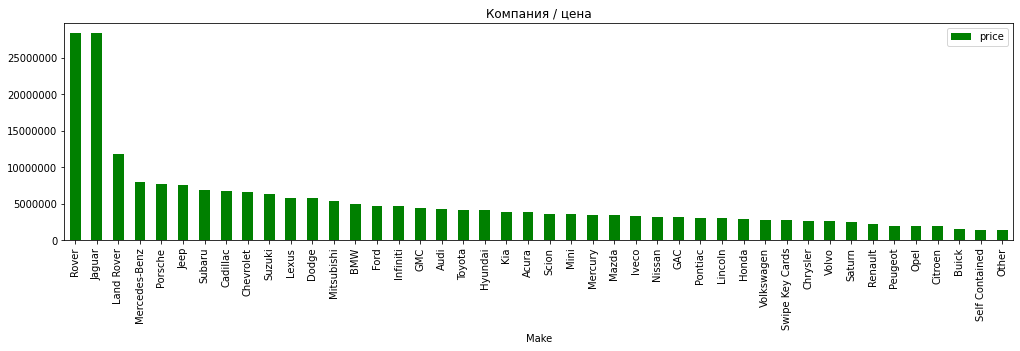

In [711]:
Concern_price.plot.bar(color='g',figsize=(17,4))
plt.ticklabel_format(axis="y", style='plain')
plt.title('Компания / цена')
plt.show()

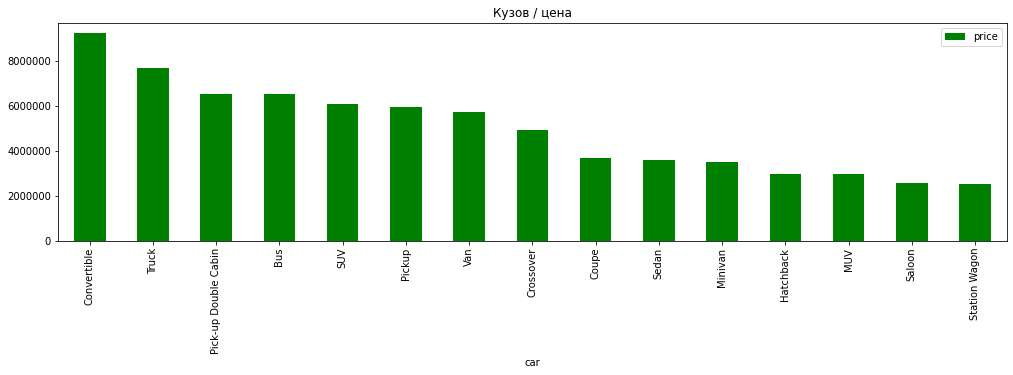

In [712]:
Car_price.plot.bar(color='g',figsize=(17,4))
plt.ticklabel_format(axis="y", style='plain')
plt.title('Кузов / цена')
plt.show()

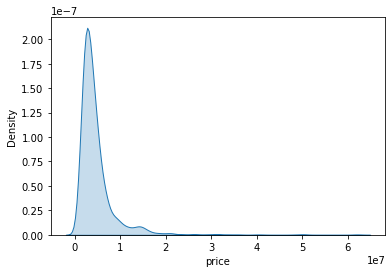

In [713]:
snsplot = sns.kdeplot(data['price'], shade=True)
fig = snsplot.get_figure()

In [714]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [715]:
fs = SelectKBest(score_func = f_regression, k = 100) 

In [716]:
fs.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


SelectKBest(k=100, score_func=<function f_regression at 0x7f454c1154d0>)

In [717]:
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

**UPD. Дерево**

In [718]:
model1 = DecisionTreeRegressor()
model1.fit(X_train_fs, y_train)

DecisionTreeRegressor()

In [719]:
y1_pred = model1.predict(X_test_fs)
metrics.mean_absolute_percentage_error(y_test,y1_pred)

0.28161499013489255

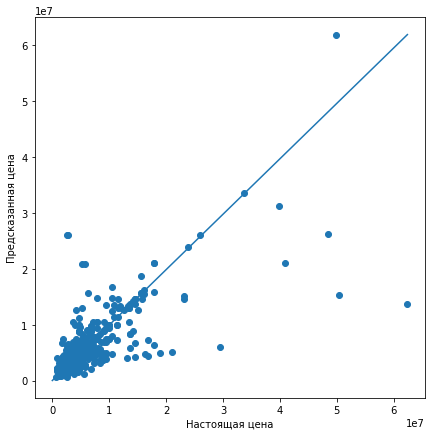

In [720]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y1_pred)
plt.plot([0, max(y_test)], [0, max(y1_pred)]) 
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена');

**UPD. Лес**

In [721]:
model2 = RandomForestRegressor(random_state=123)
model2.fit(X_train_fs, y_train)

RandomForestRegressor(random_state=123)

In [722]:
y2_pred = model2.predict(X_test_fs)
metrics.mean_absolute_percentage_error(y_test,y2_pred)

0.2532162813379947

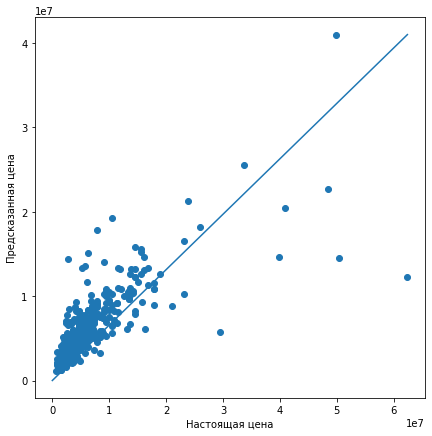

In [723]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y2_pred)
plt.plot([0, max(y_test)], [0, max(y2_pred)]) 
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена');

**UPD. Линейная регрессия**

In [724]:
model3 = LinearRegression()
model3.fit(X_train_fs, y_train)

LinearRegression()

In [725]:
y3_pred = model3.predict(X_test_fs)

In [726]:
metrics.mean_absolute_percentage_error(y_test,y3_pred)

0.28894327101924966

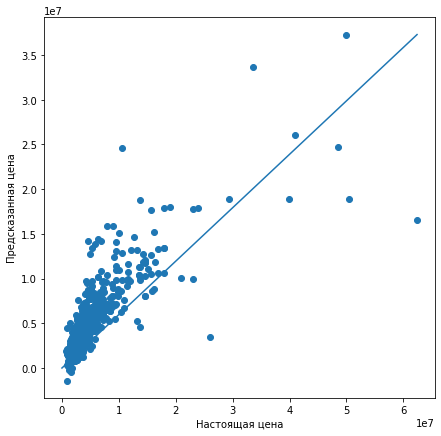

In [727]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y3_pred)
plt.plot([0, max(y_test)], [0, max(y3_pred)]) 
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена');

In [728]:
print(" Результат одного дерева :", metrics.mean_absolute_percentage_error(y_test,y1_pred), "\n",
    "Результат случайного леса :",  metrics.mean_absolute_percentage_error(y_test,y2_pred), "\n",
    "Результат линейной регрессии:",  metrics.mean_absolute_percentage_error(y_test,y3_pred)
     )

 Результат одного дерева : 0.28161499013489255 
 Результат случайного леса : 0.2532162813379947 
 Результат линейной регрессии: 0.28894327101924966
